Bài 1: Hãy trình bày cách đọc 1 tập dữ liệu vào bộ nhớ (ví dụ: Iris). Yêu cầu giải thích bằng lời và
triển khai bằng code sau đó.

In [1]:
# Khai báo thư viện 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import sqrt
from numpy import absolute

In [2]:
# Sử dụng thư viện Pandas và Read_csv để đọc tập dữu liệu 
dataset = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Classification/master/IrisDataset.csv')

Bài 2: Từ tập dữ liệu trong bộ nhớ nêu trên, hãy tiến hành mô tả bằng các thông số thống kê mô tả
và hình vẽ tương ứng.

In [3]:
#Thống kê mô tả
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#Số cột và dòng tập dữ liệu 
dataset.shape

(150, 5)

In [5]:
#Thông tin tập dữ liệu 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#Các cột trong data
dataset.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
#Kiểm tra dữ liệu rỗng
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
#Mô tả dữ liệu
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#Số lượng phần tử mỗi loại
dataset["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [10]:
#Bảng giá trị tương ứng 
dataset.groupby(dataset["sepal_length"])["species"].value_counts()

sepal_length  species   
4.3           setosa        1
4.4           setosa        3
4.5           setosa        1
4.6           setosa        4
4.7           setosa        2
4.8           setosa        5
4.9           setosa        4
              versicolor    1
              virginica     1
5.0           setosa        8
              versicolor    2
5.1           setosa        8
              versicolor    1
5.2           setosa        3
              versicolor    1
5.3           setosa        1
5.4           setosa        5
              versicolor    1
5.5           versicolor    5
              setosa        2
5.6           versicolor    5
              virginica     1
5.7           versicolor    5
              setosa        2
              virginica     1
5.8           versicolor    3
              virginica     3
              setosa        1
5.9           versicolor    2
              virginica     1
6.0           versicolor    4
              virginica     2
6.1           v

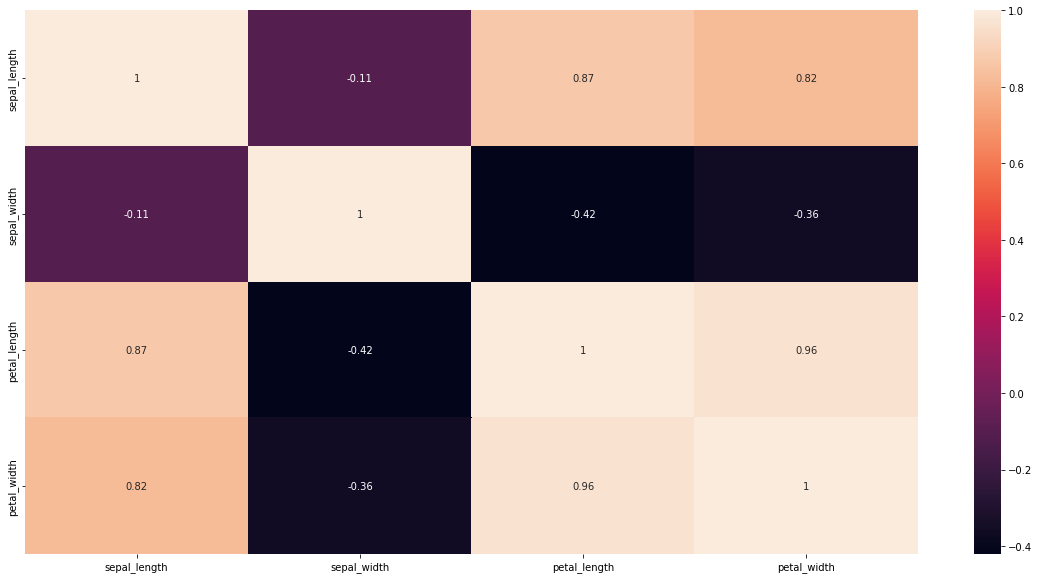

In [11]:
#Biểu đồ thể hiện mối quan hệ của các giá trị
corr = dataset.corr()
corr
plt.subplots(figsize=(20,10))
sns.heatmap(corr, annot=True)

Nhận xét: biểu đồ cho ta thấy sự tương quan giữa các giá trị trong dữ liệu. Ví dụ ta có hệ số tương quan giữa petal_width và petal length là 0,96 (tương quan dương). Khi đó nếu giá trị petal_width tăng thì giá trị petal length cũng tăng và ngược lại. Hệ số tương quan giữa petal_length và sepal_width là - 0,42 (tương quan âm) thì nếu giá trị petal_length tăng thì giá trị sepal_width giảm và ngược lại.

Chiều rộng cánh hoa và chiều dài cánh hoa có mối tương quan cao. 

Chiều dài cánh hoa và chiều rộng lá đài có mối tương quan tốt.

Chiều rộng cánh hoa và chiều dài vách ngăn có mối tương quan tốt.

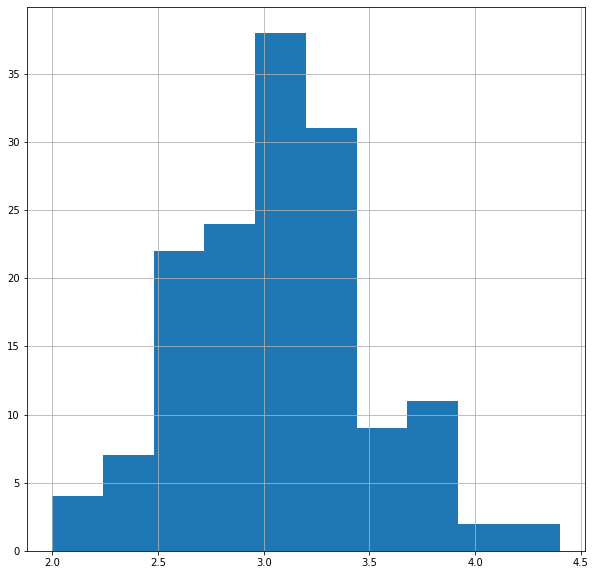

In [12]:
dataset['sepal_width'].hist(figsize=(10,10))

Nhận xét: biểu đồ histogram thể hiện phân bố tần số của biến sepal_width là biểu đồ phân bố lệch trái với giá trị giới hạn 2,4 và giá trị trung bình 3,**2**.
Tần số cao nhất của chiều rộng lá đài là khoảng 70, trong đó từ 3,0 đến 3,5

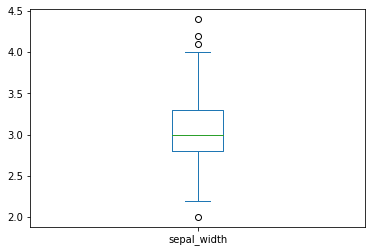

In [13]:
dataset['sepal_width'].plot(kind='box', layout=(1,4),)
plt.show()

Nhận xét: Biểu đồ hộp thể hiện các đại lượng quan trọng sepal_width như giá trị nhỏ nhất (2), giá trị lớn nhất (4), tứ phân vị (Q1 = 2,8, Q3 = 3,3), trung bình(3), khoảng cách số phần tử (0,5), trung bình tỉ lệ làm lại là 3,054%, dữ liệu có xu hướng nghiêng nhiều về phía trên giá trị trung bình. Xuất hiện các phần tử outlier

Hình dạng cũ dataset:  (150, 5)
Hình dạng mới dataset:  (146, 5)


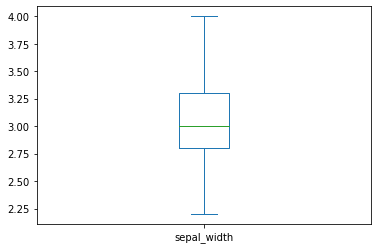

In [14]:
#Lọc phần tử outlier
Q1 = np.percentile(dataset['sepal_width'], 25,
                interpolation = 'midpoint')
  
Q3 = np.percentile(dataset['sepal_width'], 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1
  
print("Hình dạng cũ dataset: ", dataset.shape)
  
# Giới hạn trên 
upper = np.where(dataset['sepal_width'] >= (Q3+1.5*IQR))
  
# Giới hạn trên 
lower = np.where(dataset['sepal_width'] <= (Q1-1.5*IQR))
  
# Xóa Outliers
dataset.drop(upper[0], inplace = True)
dataset.drop(lower[0], inplace = True)
  
print("Hình dạng mới dataset: ", dataset.shape)
  
dataset['sepal_width'].plot(kind='box', layout=(1,4),)
plt.show()

Bài 3: Từ tập dữ liệu trong bộ nhớ nêu trên, hãy:
- Trình bày cách xác định dữ liệu và xác định nhãn lớp. Code tương ứng
- Trình bày cách chia tập dữ liệu ban đầu thành tập dữ liệu huấn luyện và tập dữ liệu kiểm
thử. Code tương ứng.

In [15]:
dataset['species'].unique() 

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [16]:
#Xác định tập dữ liệu và nhãn lớp
X = dataset[['sepal_length','sepal_width','petal_length','petal_width']]
from sklearn import preprocessing 
  
# Mã hóa dữ liệu
label_encoder = preprocessing.LabelEncoder() 
  
dataset['species']= label_encoder.fit_transform(dataset['species']) 
  
dataset['species'].unique()


Y = dataset['species']
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 146, dtype: int64

In [17]:
#Chia tập dữ liệu
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(X,Y,test_size=0.30)

In [18]:
print("Kích thước tập dữ liệu train",x_train.shape)
print("Kích thước tập dữ liệu test",x_test.shape)

Kích thước tập dữ liệu train (102, 4)
Kích thước tập dữ liệu test (44, 4)


Bài 4: Hãy trình bày lý thuyết về phương pháp 10-fold cross validation và code minh họa

Cross validation là một kỹ thuật lấy mẫu để đánh giá mô hình học máy trong trường hợp dữ liệu không được nhiều.

K-fold có nghĩa là:

Tập dữ liệu (data) được chia thành k tập con không giao nhau (gọi là “fold”) có kích thước xấp xỉ nhau.
Mỗi lần lặp, một tập con trong k tập sẽ được dùng để làm tập kiểm thử, (k-1) tập còn lại sẽ được sử dụng làm tập huấn luyện.
k giá trị lỗi (mỗi giá trị tương ứng với mỗi “fold”) sẽ được tính trung bình cộng để thu được giá trị lỗi tổng thể.
Tham số quan trọng trong kỹ thuật này là k, đại diện cho số nhóm mà dữ liệu sẽ được chia ra. Vì lý do đó, nó được mang tên k-fold cross-validation. Khi giá trị của k được lựa chọn, người ta sử dụng trực tiếp giá trị đó trong tên của phương pháp đánh giá

Tham số quan trọng trong kỹ thuật này là k, đại diện cho số nhóm mà dữ liệu sẽ được chia ra. Vì lý do đó, nó được mang tên k-fold cross-validation. Khi giá trị của k được lựa chọn, người ta sử dụng trực tiếp giá trị đó trong tên của phương pháp đánh giá. Ví dụ với k=10, phương pháp sẽ mang tên 10-fold cross-validation.

Kỹ thuật này thường bao gồm các bước như sau:

Xáo trộn dataset một cách ngẫu nhiên

Chia dataset thành k nhóm

Với mỗi nhóm:

Sử dụng nhóm hiện tại để đánh giá hiệu quả mô hình

Các nhóm còn lại được sử dụng để huấn luyện mô hình

Huấn luyện mô hình

Đánh giá và sau đó hủy mô hình

Tổng hợp hiệu quả của mô hình dựa từ các số liệu đánh giá

In [19]:
from sklearn.model_selection import KFold

In [20]:
#Tạo dữ liệu 
A = ["a",'b','c','d','e','f','g','h','j','k','l','m']

In [21]:
#Kfold CV
cv = KFold(n_splits=10, random_state= 1 , shuffle=True)

In [22]:
for train, test in cv.split(A):
  print("Train data",train,"Test data",test)

Train data [ 0  1  4  5  6  7  8  9 10 11] Test data [2 3]
Train data [ 0  1  2  3  5  6  7  8  9 11] Test data [ 4 10]
Train data [ 0  2  3  4  5  6  7  8  9 10 11] Test data [1]
Train data [ 0  1  2  3  4  5  7  8  9 10 11] Test data [6]
Train data [ 1  2  3  4  5  6  7  8  9 10 11] Test data [0]
Train data [ 0  1  2  3  4  5  6  8  9 10 11] Test data [7]
Train data [ 0  1  2  3  4  5  6  7  8  9 10] Test data [11]
Train data [ 0  1  2  3  4  5  6  7  8 10 11] Test data [9]
Train data [ 0  1  2  3  4  5  6  7  9 10 11] Test data [8]
Train data [ 0  1  2  3  4  6  7  8  9 10 11] Test data [5]


Bài 5: Hãy trình bày lý thuyết về các chủ điểm sau:
- Bias là gì?
- Overfitting là gì?
- RMSE là gì?
- Precision là gì?

Bias là sự sai lệch giữa giá trị mà model chúng ta dự đoán được với giá trị thật ( predict - ground truth). Mô hình với low bias thì chênh lệch giữa giá trị dự đoán và giá trị thật nhỏ => Mô hình tốt. Và ngược lại high bias thì chênh lệch giữa predict và ground truth lớn => Mô hình lỗi cao trên cả tập huấn luyện ( training) và tập kiểm thử ( testing) => Underfitting

Overfitting là mô hình quá khít với dữ liệu, nó sẽ đúng trên tập training nhưng trên tập test (kiểm thử ) thì kết quả rất tệ. Các mô hình này thường có bias nhỏ và độ phân tán dữ liệu lớn.

RMSE (Lỗi trung bình bình phương) là độ lệch chuẩn của phần dư ( lỗi dự đoán ). Phần dư là thước đo khoảng cách từ các điểm dữ liệu đường hồi quy; RMSE là thước đo mức độ lan truyền của những phần dư này. Nói cách khác, nó cho bạn biết mức độ tập trung của dữ liệu xung quanh dòng phù hợp nhất . Lỗi bình phương trung bình thường được sử dụng trong khí hậu học, dự báo và phân tích hồi quy để xác minh kết quả thí nghiệm.

Precision thể hiện sự chuẩn xác của model, giúp chúng ta hình dung độ tin cậy của mô hình học máy. Số này càng cao thì model phân loại càng chuẩn

Độ tin cậy = Số lần phân loại đúng/(Số lần phân loại đúng + Số lần phân loại sai)

Bài 6: Hãy trình bày phương pháp đánh giá mô hình bằng cách sử dụng tập dữ liệu kiểm thử (test
dataset) và code tương ứng

In [23]:
#Thư viện
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [24]:
#Tạo tập dữ liệu y_test là biến dự đoán, y là biến phản hồi 
df = pd.DataFrame({'y_pred': [6, 8, 12, 14, 14, 15, 17, 22, 24, 23],
                   'y_test': [6, 8, 9, 14, 14, 15, 21, 23, 24,22]})

In [25]:
 # đưa giá trị x và y
 y_test = df['y_test'] 
 y_pred = df['y_pred'] 

In [26]:
#RMSE
mean_squared_error(y_test, y_pred)

2.7

In [27]:
#Accuracy
r2_score(y_test,y_pred)*100

93.15415821501014

In [28]:
#MAE
mean_absolute_error(y_test, y_pred)

0.9

Bài 7: Bạn hãy lựa chọn 1tập dữ liệu phù hợp với bài toán hồi quy tuyến tính và xây dựng mô
hình hồi quy tuyến tính theo từng bước (kèm với mô tả của từng bước)
- Bước 1: Tải dữ liệu
- Bước 2: Mô tả dữ liệu
- Bước 3: Phân chia train – test (tỉ lệ 70% -30%)
- Bước 4: Huấn luyện mô hình với train set (10-fold cross validation)
- Bước 5: Kiểm thử mô hình với test set
- Bước 6: Trình bày kết quả và nhận xét


In [29]:
#Bước 1: Tải dữ liệu
data = pd.read_csv('https://raw.githubusercontent.com/khoa2210/Hoc-Colab/main/student_scores.csv')

In [30]:
#Bước 2: Mô tả dữ liệu 
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [31]:
#Số cột và dòng tập dữ liệu 
data.shape

(25, 2)

In [32]:
#Các cột trong data
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [33]:
#Kiểm tra dữ liệu rỗng
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [34]:
#Mô tả dữ liệu
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


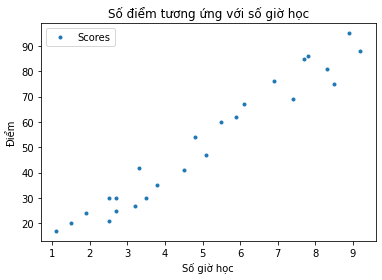

In [35]:
data.plot(x='Hours', y='Scores', style='.')
plt.title('Số điểm tương ứng với số giờ học')
plt.xlabel('Số giờ học')
plt.ylabel('Điểm')
plt.show()

Nhận xét: ta có biến điểm và biến số giờ học có mối tương quan dương. Nếu biến điểm tăng thì biến số giờ học tăng và ngược lại

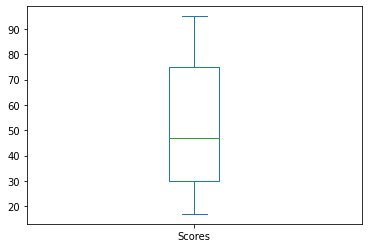

In [36]:
data['Scores'].plot(kind='box', layout=(1,4),)
plt.show()

Nhận xét: Biểu đồ hộp thể hiện các đại lượng quan trọng của số điểm như giá trị nhỏ nhất (17), giá trị lớn nhất (95), tứ phân vị (Q1 = 30, Q3 = 75), trung bình(47), khoảng cách số phần tử (45), dữ liệu có xu hướng nghiêng nhiều về phía trên giá trị trung bình. 

In [37]:
# Bước 3 phân chia tỷ lệ 
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [39]:
#Bước 4 Huấn luyện mô hình 
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [40]:
y_pred = model.predict(x_test)

In [41]:
#So sánh giá trị test và dự đoán
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [42]:
# Sử dụng K Fold CV để tạo model train
cv = KFold(n_splits= 5, random_state=1, shuffle=True)
model = LinearRegression()
Train_score= cross_val_score(model,x_train,y_train, cv=cv)

In [43]:
#Bước 5 kiểm thử mô hình 

In [44]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)*100

95.68211104435257

In [45]:
#MAE tập test
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

4.419727808027651

In [46]:
#RMSE tập test
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

22.965097212700428

In [47]:
# Giá trị MAE của tập Train
mean(absolute(Train_score))

0.9003913568534223

In [48]:
# Giá trị RMSE của tập Train
sqrt(mean(absolute(Train_score)))

0.9488895388049245

Bước 6: Trình bày kết quả

<Figure size 1008x576 with 0 Axes>

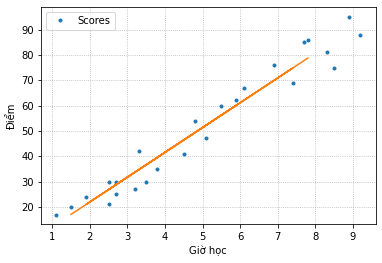

In [49]:
fig = plt.figure(figsize = (14, 8))
data.plot(x='Hours', y='Scores', style='.')
plt.plot(x_test, y_pred)

plt.legend()
plt.grid(True, linestyle =':')
plt.xlim()
plt.ylim()
 
plt.xlabel('Giờ học')
plt.ylabel('Điểm')
 
# Vẽ hình
plt.show()

Bài 8: Bạn hãy lựa chọn 1tập dữ liệu phù hợp với bài toán hồi quy phi tuyến và xây dựng mô
hình hồi quy phi tuyến theo từng bước (kèm với mô tả của từng bước)
- Bước 1: Tải dữ liệu
- Bước 2: Mô tả dữ liệu
- Bước 3: Phân chia train – test (tỉ lệ 70% -30%)
- Bước 4: Huấn luyện mô hình với train set (10-fold cross validation)
- Bước 5: Kiểm thử mô hình với test set
- Bước 6: Trình bày kết quả và nhận xét

In [50]:
#Tải dữ liệu 
data = pd.read_csv('https://raw.githubusercontent.com/khoa2210/Hoc-Colab/main/china_gdp.csv')

In [51]:
#Mô tả dữ liệu 
data.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [52]:
#Số cột và dòng tập dữ liệu 
data.shape

(55, 2)

In [53]:
#Các cột trong data
data.columns

Index(['Year', 'Value'], dtype='object')

In [54]:
#Mô tả dữ liệu
data.describe()

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


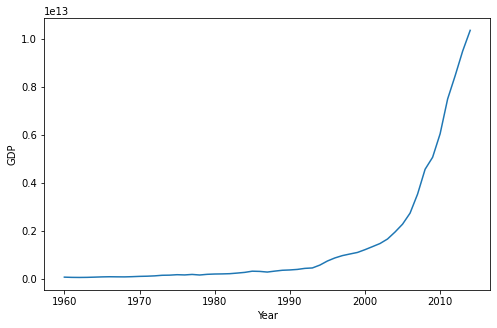

In [55]:
plt.figure(figsize=(8,5))
x_data, y_data = (data["Year"].values, data["Value"].values)
plt.plot(x_data, y_data)
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

Nhận xét: biểu đồ thể hiện GDP Trung Quốc theo năm. Biểu đồ thể hiện tăng trưởng dương nhất là tăng mạnh từ năm 2000 đến năm 2010

In [56]:
# Tạo Model 
def sigmoid(x, beta_1, beta_2):
     y = 1 / (1 + np.exp(-beta_1*(x-beta_2)))
     return y

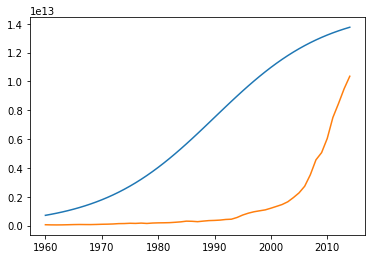

In [57]:
beta_1 = 0.10
beta_2 = 1990.0

#Hàm logistic
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data)

In [58]:
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [59]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#giá trị beta 1 và 2 
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.453019, beta_2 = 0.997207


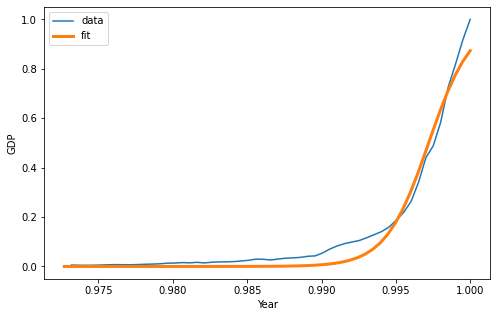

In [60]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [61]:
# Chia tập dữ liệu train - test
msk = np.random.rand(len(data)) < 0.7
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]
# Tạo model 
popt, pcov = curve_fit(sigmoid, train_x, train_y)
# Dự đoán 
y_pred = sigmoid(test_x, *popt)
# Kiểm thử mô hình 
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - test_y) ** 2))
print('RMSE: ',mean_squared_error(test_y, y_pred, squared=False))
from sklearn.metrics import r2_score
r2_score(y_pred, test_y)

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
RMSE:  0.039152874764417256


0.8988875852334902

Bài 9: Bạn hãy lựa chọn 1tập dữ liệu phù hợp với bài toán hồi quy logistic và xây dựng mô hình
hồi quy logistic theo từng bước (kèm với mô tả của từng bước)
- Bước 1: Tải dữ liệu
- Bước 2: Mô tả dữ liệu
- Bước 3: Phân chia train – test (tỉ lệ 70% -30%)
- Bước 4: Huấn luyện mô hình với train set (10-fold cross validation)
- Bước 5: Kiểm thử mô hình với test set
- Bước 6: Trình bày kết quả và nhận xét

In [62]:
# Khai báo thư viện 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

In [63]:
# Sử dụng thư viện Pandas và Read_csv để đọc tập dữu liệu 
dataset = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Classification/master/IrisDataset.csv')

In [64]:
#Thống kê mô tả
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [65]:
#Số cột và dòng tập dữ liệu 
dataset.shape

(150, 5)

In [66]:
#Thông tin tập dữ liệu 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [67]:
#Các cột trong data
dataset.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [68]:
#Kiểm tra dữ liệu rỗng
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [69]:
#Mô tả dữ liệu
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [70]:
#Số lượng phần tử mỗi loại
dataset["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [71]:
#Bảng giá trị tương ứng 
dataset.groupby(dataset["sepal_length"])["species"].value_counts()

sepal_length  species   
4.3           setosa        1
4.4           setosa        3
4.5           setosa        1
4.6           setosa        4
4.7           setosa        2
4.8           setosa        5
4.9           setosa        4
              versicolor    1
              virginica     1
5.0           setosa        8
              versicolor    2
5.1           setosa        8
              versicolor    1
5.2           setosa        3
              versicolor    1
5.3           setosa        1
5.4           setosa        5
              versicolor    1
5.5           versicolor    5
              setosa        2
5.6           versicolor    5
              virginica     1
5.7           versicolor    5
              setosa        2
              virginica     1
5.8           versicolor    3
              virginica     3
              setosa        1
5.9           versicolor    2
              virginica     1
6.0           versicolor    4
              virginica     2
6.1           v

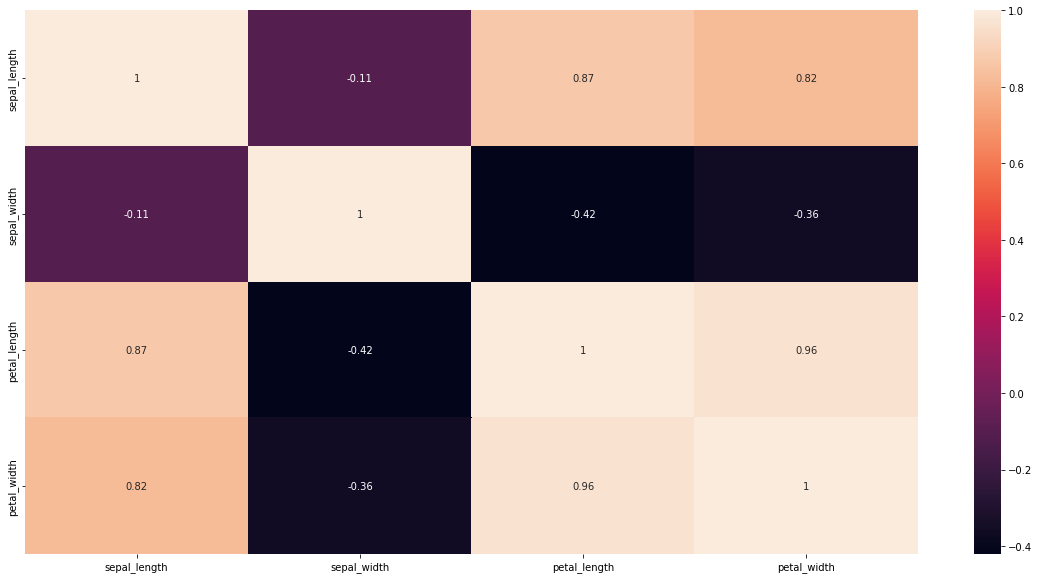

In [72]:
#Biểu đồ thể hiện mối quan hệ của các giá trị
corr = dataset.corr()
corr
plt.subplots(figsize=(20,10))
sns.heatmap(corr, annot=True)

Nhận xét: biểu đồ cho ta thấy sự tương quan giữa các giá trị trong dữ liệu. Ví dụ ta có hệ số tương quan giữa petal_width và petal length là 0,96 (tương quan dương). Khi đó nếu giá trị petal_width tăng thì giá trị petal length cũng tăng và ngược lại. Hệ số tương quan giữa petal_length và sepal_width là - 0,42 (tương quan âm) thì nếu giá trị petal_length tăng thì giá trị sepal_width giảm và ngược lại.

Chiều rộng cánh hoa và chiều dài cánh hoa có mối tương quan cao. 

Chiều dài cánh hoa và chiều rộng lá đài có mối tương quan tốt.

Chiều rộng cánh hoa và chiều dài vách ngăn có mối tương quan tốt.

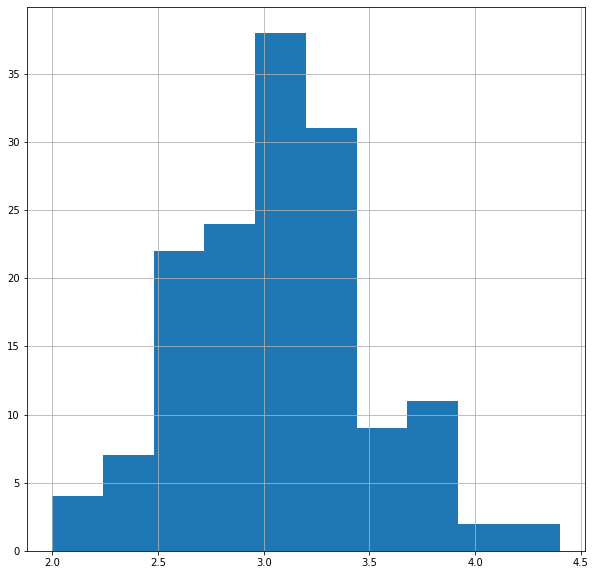

In [73]:
dataset['sepal_width'].hist(figsize=(10,10))

Nhận xét: biểu đồ histogram thể hiện phân bố tần số của biến sepal_width là biểu đồ phân bố lệch trái với giá trị giới hạn 2,4 và giá trị trung bình 3,**2**.
Tần số cao nhất của chiều rộng lá đài là khoảng 70, trong đó từ 3,0 đến 3,5

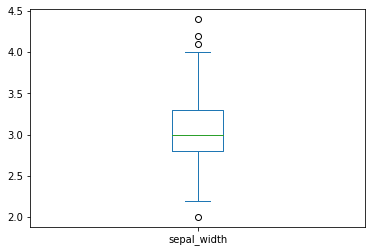

In [74]:
dataset['sepal_width'].plot(kind='box', layout=(1,4),)
plt.show()

Nhận xét: Biểu đồ hộp thể hiện các đại lượng quan trọng sepal_width như giá trị nhỏ nhất (2), giá trị lớn nhất (4), tứ phân vị (Q1 = 2,8, Q3 = 3,3), trung bình(3), khoảng cách số phần tử (0,5), trung bình tỉ lệ làm lại là 3,054%, dữ liệu có xu hướng nghiêng nhiều về phía trên giá trị trung bình. Xuất hiện các phần tử outlier

Hình dạng cũ dataset:  (150, 5)
Hình dạng mới dataset:  (146, 5)


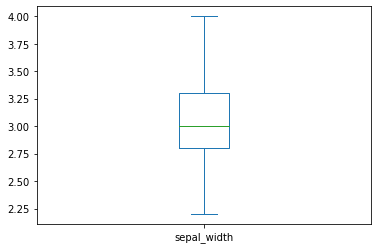

In [75]:
#Lọc phần tử outlier
Q1 = np.percentile(dataset['sepal_width'], 25,
                interpolation = 'midpoint')
  
Q3 = np.percentile(dataset['sepal_width'], 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1
  
print("Hình dạng cũ dataset: ", dataset.shape)
  
# Giới hạn trên 
upper = np.where(dataset['sepal_width'] >= (Q3+1.5*IQR))
  
# Giới hạn trên 
lower = np.where(dataset['sepal_width'] <= (Q1-1.5*IQR))
  
# Xóa Outliers
dataset.drop(upper[0], inplace = True)
dataset.drop(lower[0], inplace = True)
  
print("Hình dạng mới dataset: ", dataset.shape)
  
dataset['sepal_width'].plot(kind='box', layout=(1,4),)
plt.show()

In [76]:
X = dataset.iloc[:, [0,1,2, 3]].values
y = dataset.iloc[:, 4].values
# Dùng train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [77]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [78]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [79]:
#Giá trị dự đoán
y_pred = model.predict(X_test)
# Các khả năng dự đoán 
probs_y=model.predict_proba(X_test)
### Kết quả 
probs_y = np.round(probs_y, 2)
res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test", "y_pred", "Setosa(%)", "versicolor(%)", "virginica(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) for x, y, a, b, c in zip(y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*65+"\n"
print(res)

y_test     | y_pred     | Setosa(%)  | versicolor(%) | virginica(%)
-----------------------------------------------------------------
setosa     | setosa     | 0.97       | 0.03          | 0.0       
setosa     | setosa     | 0.91       | 0.09          | 0.0       
setosa     | setosa     | 0.97       | 0.03          | 0.0       
virginica  | virginica  | 0.0        | 0.31          | 0.69      
virginica  | virginica  | 0.0        | 0.18          | 0.82      
versicolor | versicolor | 0.0        | 0.71          | 0.28      
setosa     | setosa     | 0.99       | 0.01          | 0.0       
setosa     | setosa     | 0.93       | 0.07          | 0.0       
virginica  | virginica  | 0.0        | 0.22          | 0.78      
setosa     | setosa     | 0.97       | 0.03          | 0.0       
setosa     | setosa     | 0.97       | 0.03          | 0.0       
versicolor | versicolor | 0.04       | 0.91          | 0.05      
virginica  | virginica  | 0.0        | 0.48          | 0.52      
versicol

In [80]:
test_score = model.score(X_test,y_test)
test_score

0.9772727272727273

In [81]:
# Sử dụng 10 Fold CV để tạo model train
cv = KFold(n_splits= 10, random_state=1, shuffle=True)
model = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
Train_score= cross_val_score(model,X_train,y_train, cv=cv)

In [82]:
#MAE
mean(absolute(Train_score))

0.9509090909090909

In [83]:
#RMSE
sqrt(mean(absolute(Train_score)))

0.9751456767627548